# Monty Hall gameshow 

From the lectures, we showed using Bayes' theorem that in the Monte Hall gameshow, the most successful strategy (counter-intuitively) is to swap, rather than stick. We'll confirm this in a simulation.

Remember in the Monte Hall gameshow, we have three boxes A, B and C, one of which contains a prize. 

![MontyHall](MontyHall.png)

The game goes as follows 

1. You pick a box but don't open it 
2. The host opens one of the other two boxes and opens it, revealing that it doesn't contain the prize
3. You are offered the choice to swap boxes with the remaining unopened box or stick with your original choice 

Start with the usual imports. Numpy has a `random.choice` module that will be useful to simulate the games.

In [1]:
#%matplotlib notebook
import numpy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rc('font', size=14) 
plt.rcParams['figure.figsize'] = (6, 6)

Now, we play the game `ngames` times and fill a histogram with the results. In our games, the box that contains the prize is random, but actually that doesn't matter since our choice is also random. 

The module `random.choice` picks from a list at random. We need to use reduced lists based on the choices made by the player and which box has the prize so for that we use the list comprehension functionality in python ` [x for x in list if statement] `.

In [8]:
prize_boxes = ["A","B","C"]

def playmontehall(strategy,ngames=1):
   games = []
   for n in range(ngames) :
    prize = numpy.random.choice(prize_boxes)

    # player chooses a box
    player_choice = numpy.random.choice(prize_boxes)

    # host opens a box from remaning boxes.
    remaining_choices = [c for c in prize_boxes if c not in [prize,player_choice]]
    host_choice = numpy.random.choice(remaining_choices)
    remaining_box = [c for c in prize_boxes if c not in [host_choice,player_choice]]

    # now player can swap or stick
    if strategy == "swap":
     original_choice = player_choice
     player_choice = remaining_box[0]
     if ngames <=1 : print("Player chose box %s originally, host opened box %s, player swapped to box %s"%(original_choice,host_choice,player_choice))
    else:
     if ngames <=1 : print("Player chose box %s, host opened box %s"%(player_choice,host_choice))
    if ngames <=1 :
      print(" .... prize was in box %s"%(prize))
      if player_choice==prize: print(" -----> WIN!")
      else: print(" -----> LOSE :(")

    if player_choice==prize: games.append("win")
    else : games.append("lose")
   return games

In [3]:
playmontehall("stick")

['lose']

Now, we play the game ngames times and fill a histogram with the results. In our games, the box that contains the prize is random, but actually that doesn't matter since our choice is also random.

We'll see how often each strategy wins.

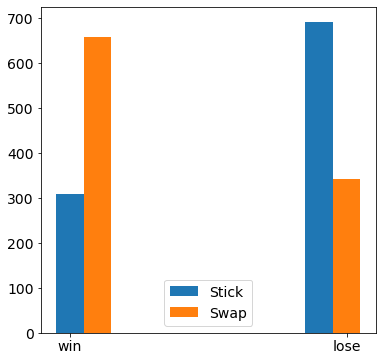

In [12]:
games_stick = playmontehall("stick",ngames=1000)
games_swap  = playmontehall("swap" ,ngames=1000)

plt.hist(games_stick, align='left',label="Stick")
plt.hist(games_swap, align='right',label="Swap")
plt.legend()
plt.show()